<a href="https://colab.research.google.com/github/PanosRntgs/Machine-Learning/blob/main/Analyzing_Life_Satisfaction_and_GDP_Relationship_Polynomial_Regression_and_K_Nearest_neighbours_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data: The data frame of Life satisfaction and the GDP per capita (full_country_stats).

Utilize polynomial regression with a degree of 8 and visualize the outcomes.

Determine the life satisfaction index (LSI) for a nation with a GDP of 97000.

Employ the three closest neighboring countries to the one with a GDP of 97000 to approximate its LSI.

Compare the forecasts generated by the two methods and provide insights.

Generate predictions using polynomial degrees ranging from 1 to 10.

Analyze the findings.

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
import numpy as np

np.random.seed(42)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tarfile
import urllib.request
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Download and prepare the data
data_root = "https://raw.githubusercontent.com/ageron/data/main/lifesat/lifesat.csv"
lifesat = pd.read_csv(data_root)
C = lifesat[["Country"]]
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

#lifesat.head()
lifesat.info()
lifesat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes


,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


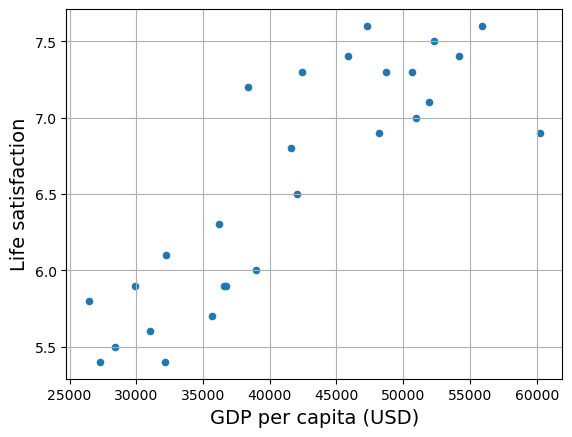

In [ ]:
# Visualize the data
lifesat.plot(kind="scatter",
             grid=True,
            x="GDP per capita (USD)",
            y="Life satisfaction")
plt.show()

In [ ]:
# Define the polynomial degree for regression
# Create polynomial features
poly_features = PolynomialFeatures(degree=8)
X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for the entire range of GDP per capita values
X_Vals = np.linspace(X.min(), X.max())
X_Vals_poly = poly_features.transform(X_Vals.reshape(-1, 1))
y_pred = model.predict(X_Vals_poly)

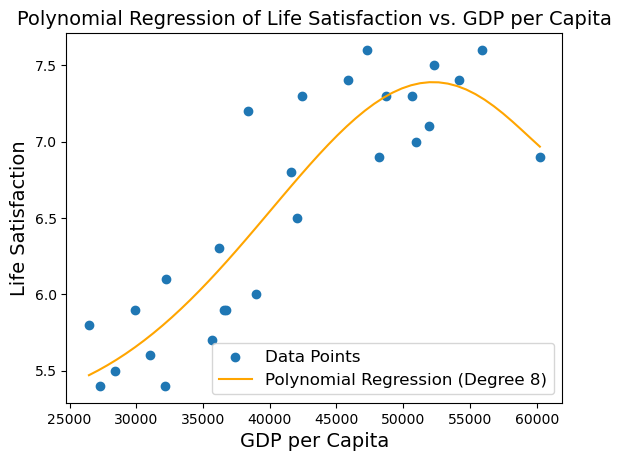

In [ ]:
# Plot the original data and the polynomial regression curve
degree=8
plt.scatter(X, y, label="Data Points")
plt.plot(X_Vals, y_pred, color='orange', label="Polynomial Regression (Degree {})".format(degree))
plt.xlabel("GDP per Capita")
plt.ylabel("Life Satisfaction")
plt.legend()
plt.title("Polynomial Regression of Life Satisfaction vs. GDP per Capita")
plt.show()

In [ ]:
# GDP per capita for the country we want to calculate LSI for
GDP_of_country = 97000

# Transform the GDP value using the same PolynomialFeatures as the previous
GDP_of_country_poly = poly_features.transform(np.array([[GDP_of_country]]))

# Predict the LSI for the country
LSI_of_country = model.predict(GDP_of_country_poly)

# Print the LSI for the country
print("Life Satisfaction Index (LSI) for a country with GDP equal to", GDP_of_country,"is :" ,{LSI_of_country[0, 0]})


Life Satisfaction Index (LSI) for a country with GDP equal to 97000 is : {364.10716887978805}


In [ ]:
from sklearn.neighbors import NearestNeighbors
# GDP per capita for the country you want to estimate LSI for
GDP_of_country = 97000

# Number of nearest neighbors to consider
n_neighbors = 3

# Create an array containing all GDP values
X_all = np.array(lifesat["GDP per capita (USD)"]).reshape(-1, 1)

# Fit a Nearest Neighbors model
nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X_all)

# Find the indices of the nearest neighbors
distances, indices = nbrs.kneighbors(np.array([[GDP_of_country]]))

# Extract the GDP values of the nearest neighbors
nearest_GDP_values = X_all[indices[0]]

# Calculate the average LSI of the nearest neighbors
average_LSI = np.mean(lifesat.iloc[indices[0]]["Life satisfaction"])

# Print the estimated LSI
print("Estimated LSI for a country with GDP equal to", GDP_of_country, "is :", average_LSI)

Estimated LSI for a country with GDP equal to 97000 is : 7.3


In [ ]:
# Comparing the predictions of the two approaches
print("Polynomial Regression LSI:", LSI_of_country)
print("K-Nearest Neighbors Estimated LSI:", average_LSI)

Polynomial Regression LSI: [[364.10716888]]
K-Nearest Neighbors Estimated LSI: 7.3


Using a polynomial of degree 8, we calculated the Life Satisfaction Index (LSI) of a country with a GDP of 97000 to be approximately 364. However, when we relied on the LSIs of the three nearest neighbors in terms of GDP, we predicted a value of 7.3, which seems reasonable.This result shows that the polynomial of degree 8 overfits the training data but fails to generalize with data points not existing in the database.

In [ ]:
# Make predictions using polynomials with degrees from 1 to 10
for n in range(1, 11):
    poly = PolynomialFeatures(degree=n)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    GDP_of_country_poly = poly.transform(np.array([[GDP_of_country]]))
    LSI_of_country = model.predict(GDP_of_country_poly)[0]

    print("Degree",n ,": LSI for GDP=", GDP_of_country, "is", LSI_of_country)

Degree 1 : LSI for GDP= 97000 is [10.32458213]
Degree 2 : LSI for GDP= 97000 is [4.79507038]
Degree 3 : LSI for GDP= 97000 is [-26.07579115]
Degree 4 : LSI for GDP= 97000 is [-43.71451617]
Degree 5 : LSI for GDP= 97000 is [-59.37854478]
Degree 6 : LSI for GDP= 97000 is [-51.02636702]
Degree 7 : LSI for GDP= 97000 is [42.07406382]
Degree 8 : LSI for GDP= 97000 is [364.10716888]
Degree 9 : LSI for GDP= 97000 is [1224.0289402]
Degree 10 : LSI for GDP= 97000 is [3238.56798987]


As the degree increases the model is overfitting the training data and again loses its ability to make accurate predictions for GDP for values not existing in the database.This makes the model less trustworthy when predicting life satisfaction for countries with GDP values not in the training data.So, it's important to have a balance when picking the polynomial's degree to avoid overfitting and ensure it can generalize well to new data.